# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
from IPython.display import display
import os

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!

file_name = "readonly/images.zip"

with zipfile.ZipFile(file_name, 'r') as zip: 
    zip.extractall()    

In [2]:
os.listdir()
# we can see we have all the images from a-0 to a-13

['module_3.ipynb',
 'module_1-lec1.ipynb',
 'a-7.png',
 'a-12.png',
 'a-3.png',
 'module_3-lec3.ipynb',
 'module_2-lec4.ipynb',
 'a-10.png',
 'a-1.png',
 'module_3-lec1.ipynb',
 'module_1-lec3.ipynb',
 'a-9.png',
 '.ipynb_checkpoints',
 'a-5.png',
 'module_1.ipynb',
 'readonly',
 'module_2-lec6.ipynb',
 'a-0.png',
 'assignment_1.ipynb',
 'module_1-lec2.ipynb',
 'a-8.png',
 'a-13.png',
 'a-4.png',
 'module_2-lec5.ipynb',
 'a-11.png',
 'a-2.png',
 'module_3-lec2.ipynb',
 'module_2-lec3.ipynb',
 'module_2.ipynb',
 'a-6.png',
 'project.ipynb',
 'module_3-lecoptional.ipynb']

In [3]:
from PIL import Image, ImageDraw
import cv2 as cv
import numpy as np
import pytesseract
import math
from IPython.display import display

def process_image(file_path,keyword):
    
    def binarise(image, threshold = 135):
        arr = np.asarray(image)
        arr = np.where(arr > threshold, 255, 0)
        binarise_image = Image.fromarray((arr).astype(np.uint8))
        
        return binarise_image
    
    def detect_faces(file_path):
        image_cv = cv.imread(file_path) # image for cv
        image_cv_gray = cv.cvtColor(image_cv, cv.COLOR_BGR2GRAY)
    
        faces = face_cascade.detectMultiScale(image_cv_gray, 1.35)

        if(faces != ()):
            boxes = faces.tolist()
        else:
            boxes = []
        
        return boxes
    
    def detect_text(file_path):
        image = Image.open(file_path).convert('L')
        image_pt = binarise(image.resize((image.width//2, image.height//2)))  # image for pytesseract
        text = pytesseract.image_to_string(image_pt)
        
        return text
    
    def make_contact_sheet(file_path, boxes):
        image = Image.open(file_path)
        
        def crop_image(image, boxes):
            images = []
            for box in boxes:
                images.append(image.crop((box[0], box[1], box[0]+box[2], box[3]+box[1])))
  
            return images

        images = crop_image(image, boxes)
    
        refer_image = images[0]
        contact_sheet = Image.new(refer_image.mode, (400*5, 400 * math.ceil(len(images)/5)))

        x = 0
        y = 0

        for img in images:
            img = img.resize((400, 400))
            contact_sheet.paste(img, (x, y))
    
            if x + 400 == 400 * 5:
                x=0
                y = y + 400
            
            else:
                x = x + 400
        
        return contact_sheet
            
        
        
        
    
    text = detect_text(file_path)
    
    if (text.find(keyword) != -1): 
        boxes = detect_faces(file_path)
        if(len(boxes)):
            contact_sheet_image = make_contact_sheet(file_path, boxes)
            print("\nKeyword was found in file %s.png"%(file_path))
            display(contact_sheet_image)
            print("\n\n")
        else:
            print("\nkeyword was found in file %s.png, but no faces detected"%(file_path))
            print("\n\n")
        
    else: 
        print ("\nkeyword was not found in file %s.png"%(file_path))
        print("\n\n")
    
    
    


## small_png :  Keyword - Christopher


Keyword was found in file a-0.png.png


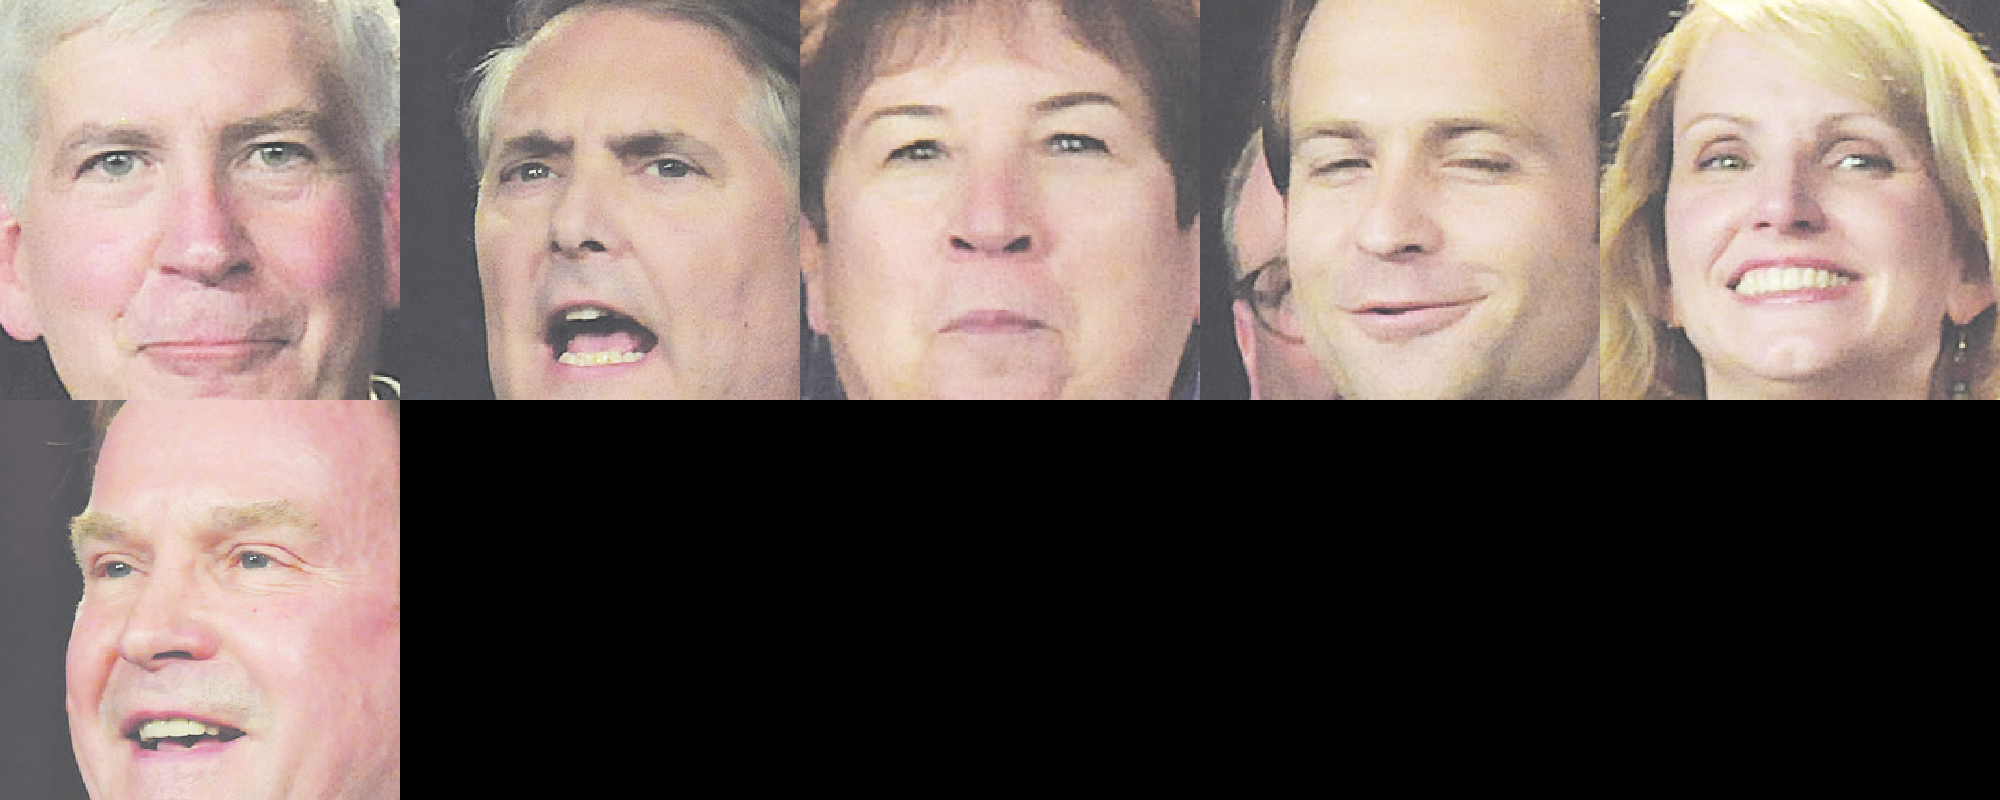





keyword was not found in file a-1.png.png




keyword was not found in file a-2.png.png




Keyword was found in file a-3.png.png


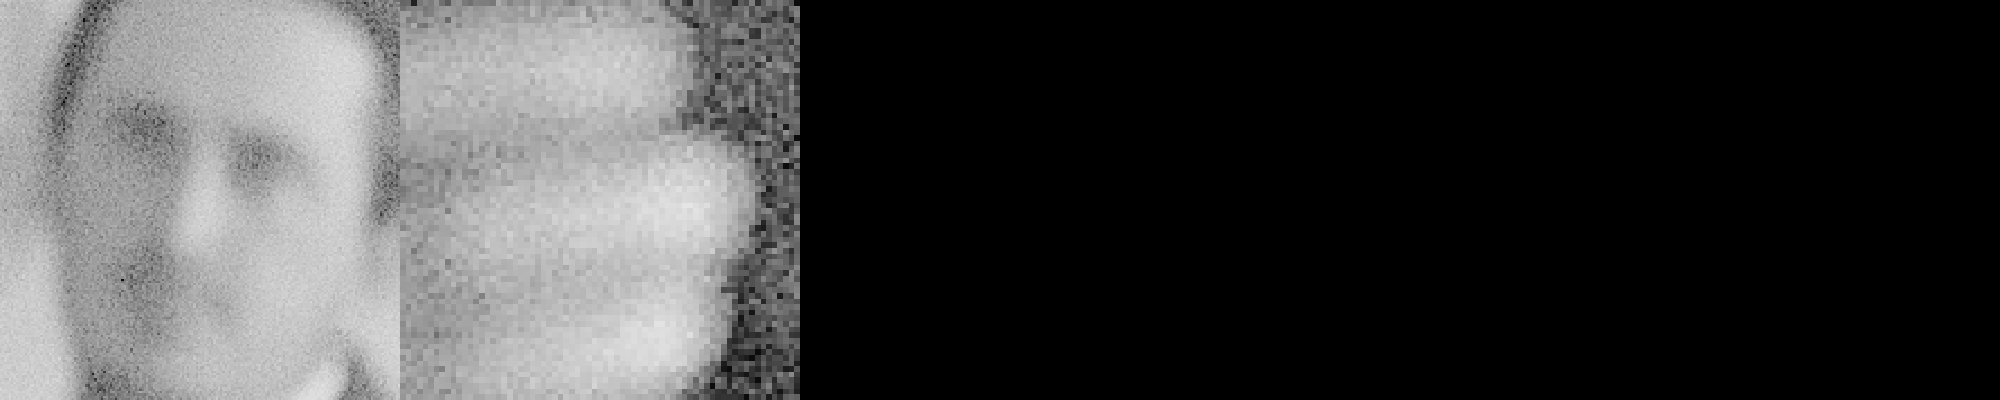




CPU times: user 32 s, sys: 1.77 s, total: 33.8 s
Wall time: 10min 38s


In [4]:
%%time
for i in range(0,4):
    process_image("a-%d.png"%(i),"Christopher")

## All pngs : Keyword - Mark


Keyword was found in file a-0.png.png


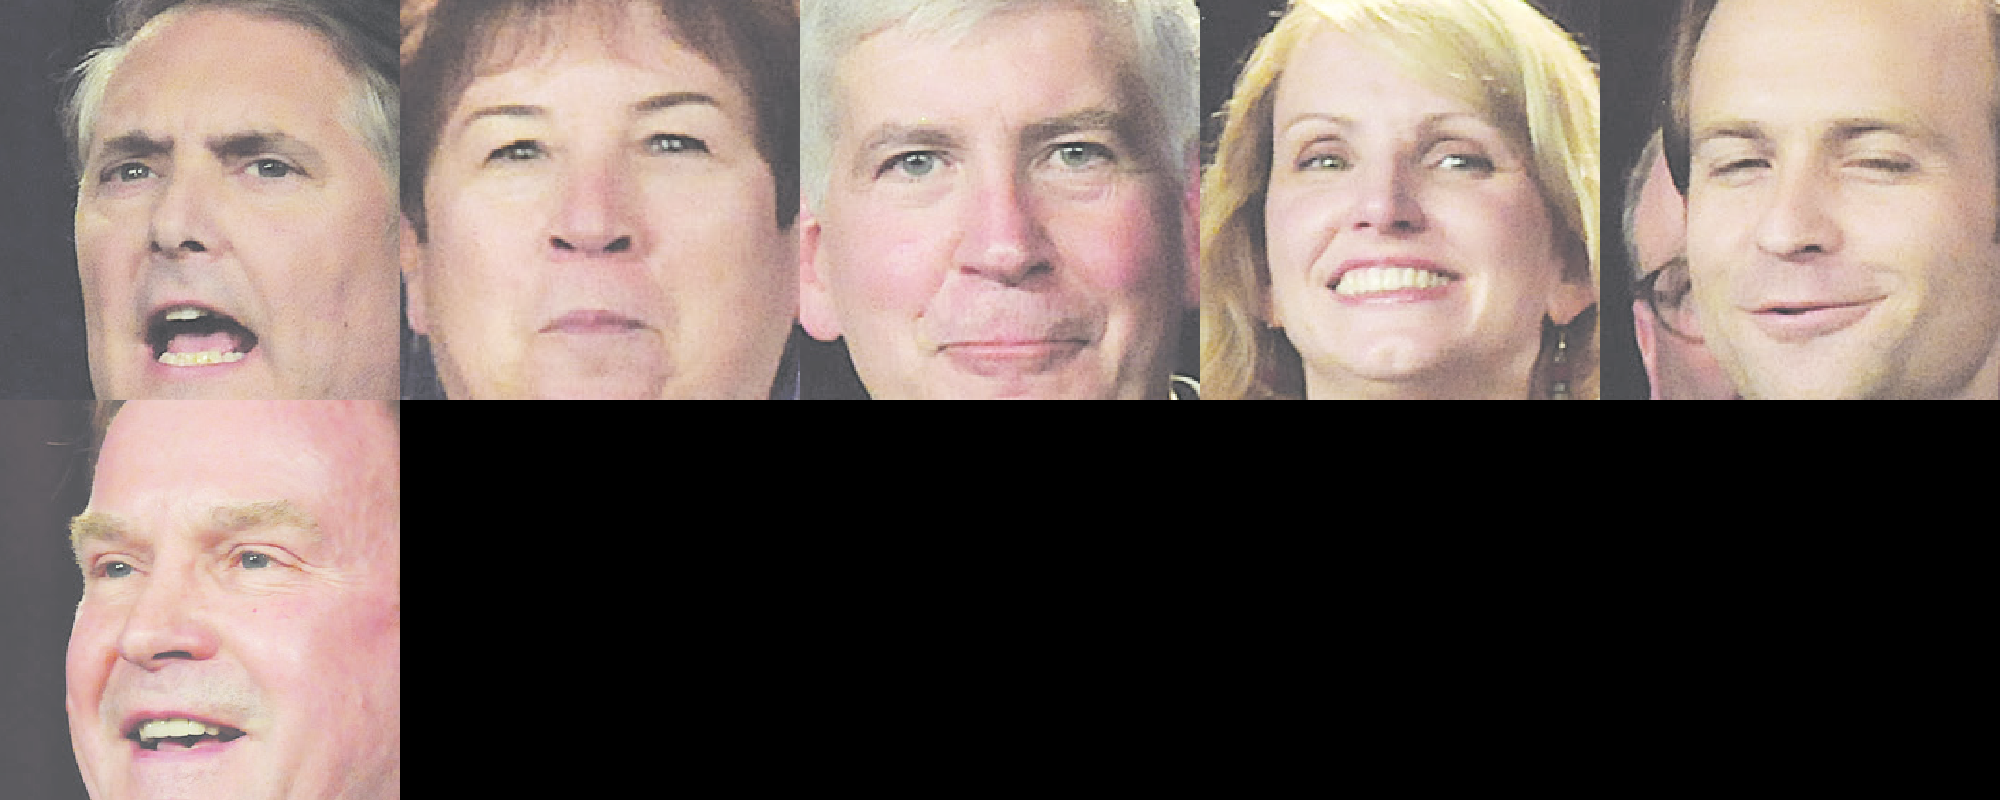





Keyword was found in file a-1.png.png


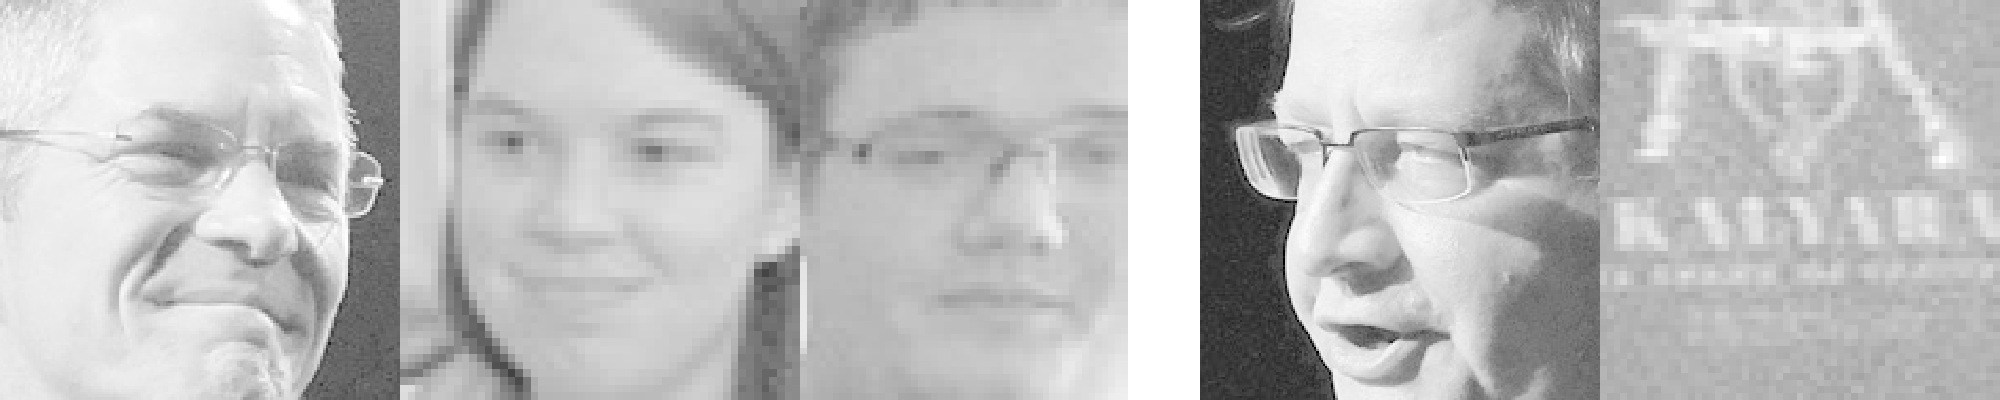





Keyword was found in file a-2.png.png


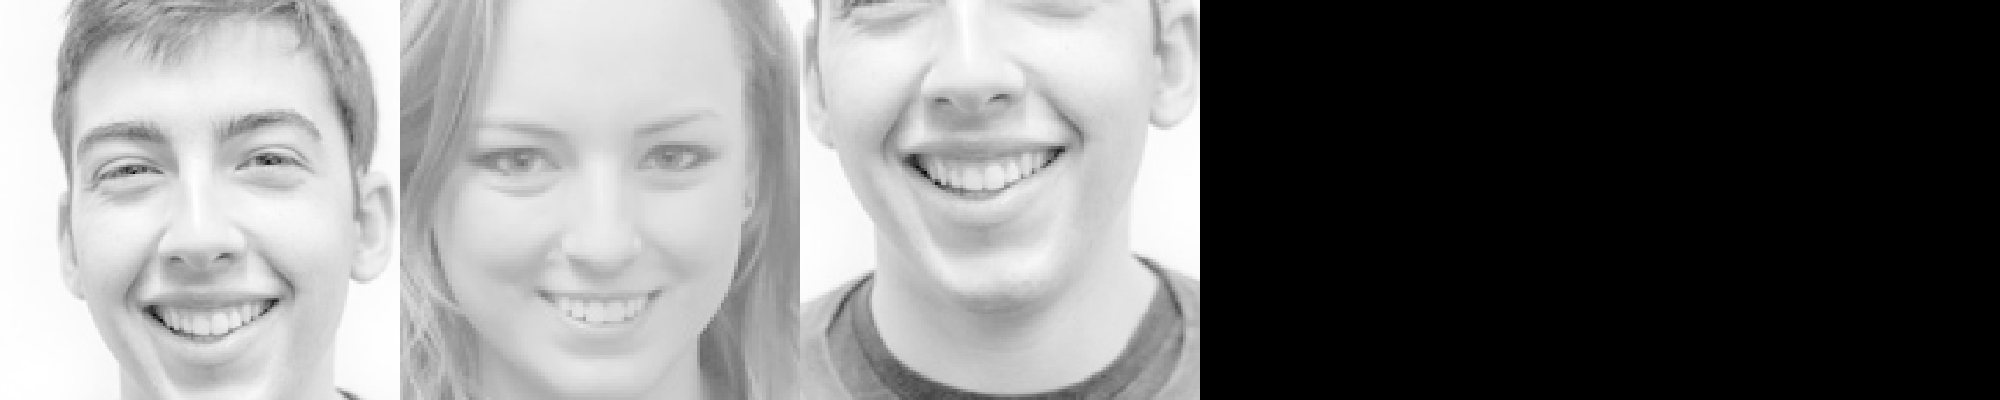





Keyword was found in file a-3.png.png


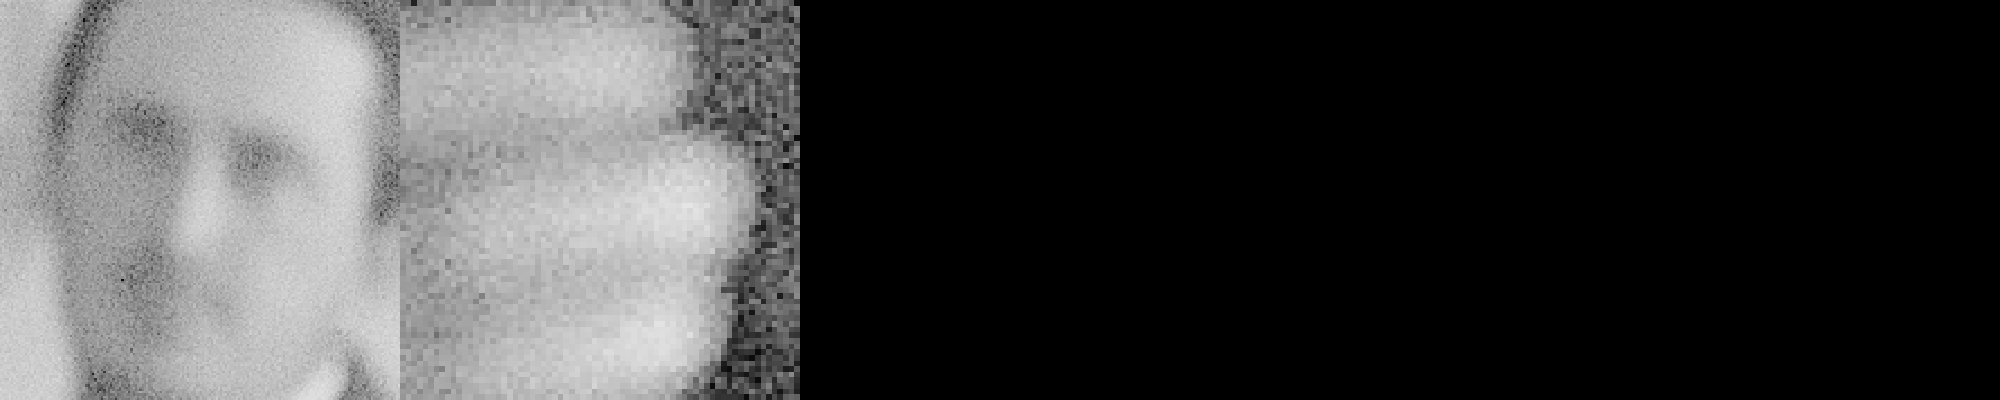





keyword was not found in file a-4.png.png




keyword was not found in file a-5.png.png




keyword was not found in file a-6.png.png




keyword was not found in file a-7.png.png




Keyword was found in file a-8.png.png


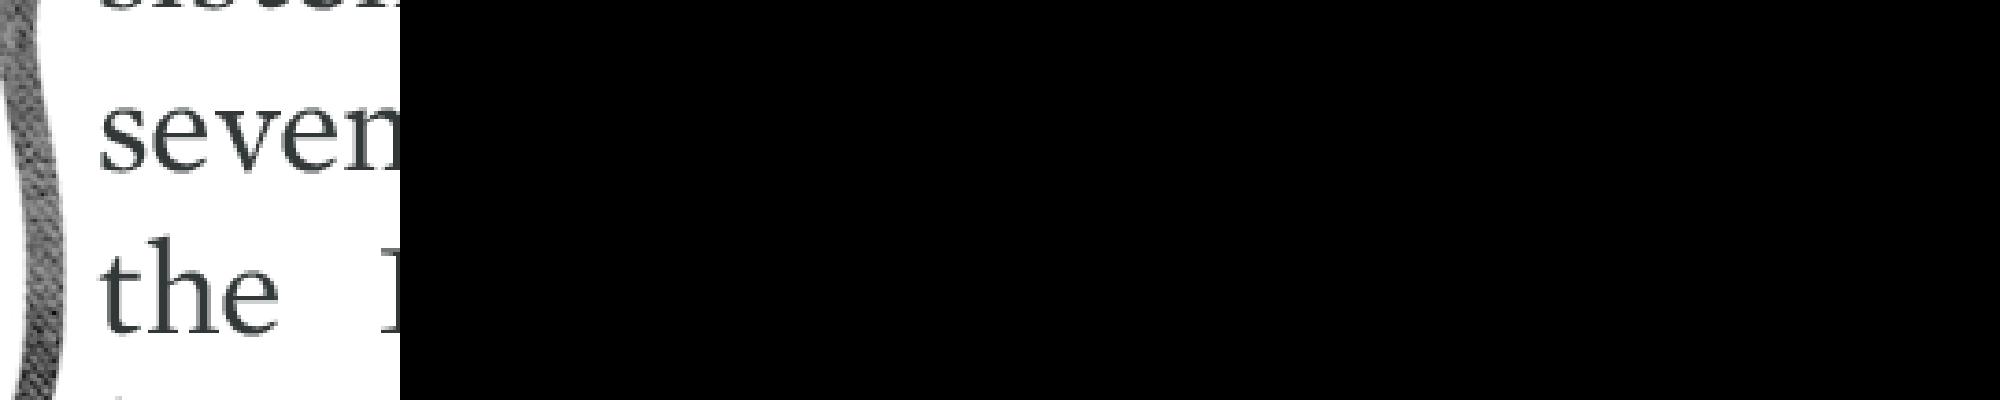





keyword was not found in file a-9.png.png




keyword was found in file a-10.png.png, but no faces detected




keyword was not found in file a-11.png.png




keyword was not found in file a-12.png.png




Keyword was found in file a-13.png.png


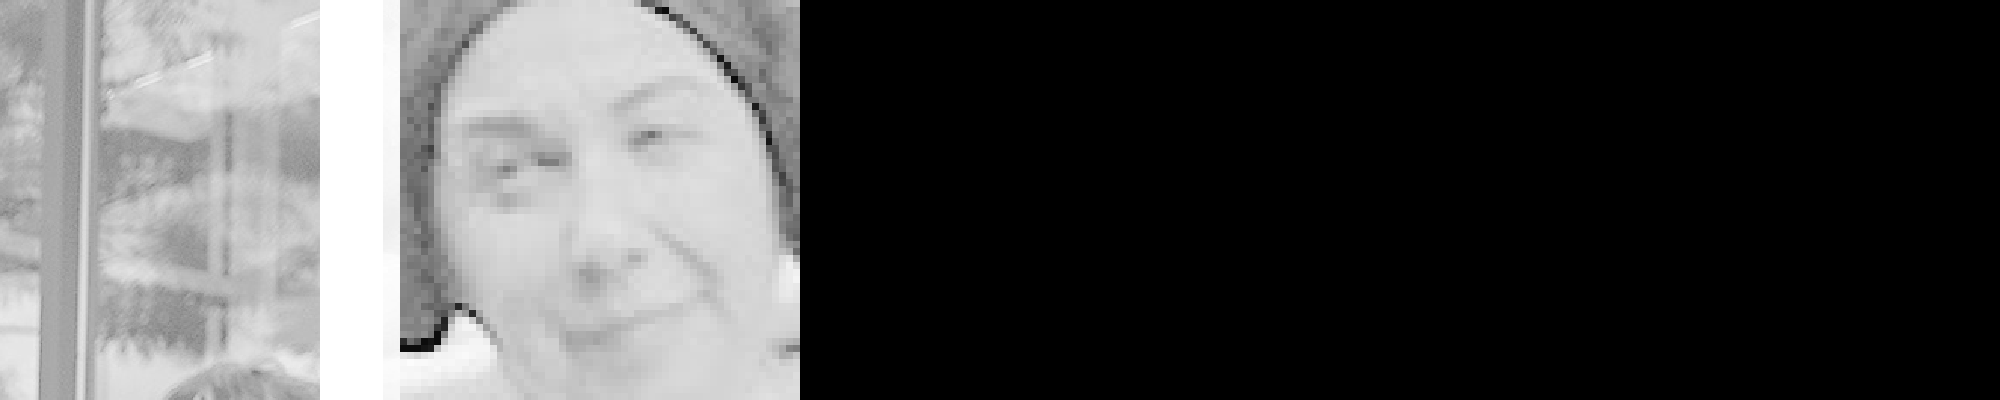




CPU times: user 1min 19s, sys: 3.54 s, total: 1min 22s
Wall time: 20min 31s


In [5]:
%%time
for i in range(0,14):
    process_image("a-%d.png"%(i),"Mark")